# Stock Sentiment Analysis and Summarization via Web scrapping 
**CHECK OUT**<br>
<a href="https://github.com/ArshidSri/Sentiment_Analysis_Summarization_webscrapping"> source_code_github </a>(Jupyter Notebook and Python file)<br>
<a href="https://jovian.ai/arshidsriraam7/sentiment-analysis-finviz"> source_code_jovian </a>(Jupyter Notebook)

### Inspiration for the project:
Stock Market is a huge gamble for some because they are not informed with proper data to make the right decisions. People take a lot of time in deciding which Cafe they would walk into but not spend enough time on the stock they invest. It is because people have less time but this is when AI comes to the rescue. Abstractive summarization and webscrapping seems to aid us more to gather the required information to make the right decisions.
<br>
Big thumbs up to <a href="https://www.jovian.ai">Jovian</a> team for introducing the concept of sentiment analysis in their free course assignments which paved the way for the current pipelines of the project. 
<br>
Thanks to <a href="https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment">Nicholas Reonette</a> for his work on NLP code which is highly customizable for any NLP project which is the base for the pipeline 2 of my project.

##### Structure of the project:
1. Install and Import Dependencies
2. Summarization models
- Type1: Summarization Model ------------>(Basic newspaper3k)
- Type2 Summarization Model ------------>(Financial Summarization Pegasus model)
3. News and Sentiment Pipeline 1: Finiviz website
- 3a_1 Web Scrapping from finviz website using the ticker (Output: CSV file)
- 3a_2 Web Scrapping from finviz website using the ticker_list (Output: CSV file)  
- 3a_3  View the stock as a Data_frame and perform sentiment analysis
- 3a_4 Cleaning the data in the data frame
- 3a_5 Sentiment Analysis
- 3a_6 Scraping Articles
4. News and Sentiment Pipeline 2: Stock News from Google & any Stock NEWS  website 
- 4a_1 Search for Stock News using Google and Yahoo Finance and strip out unwanted URLs
- 4a_2 Searching and Webscrapping final URLs
- 4a_3 Summarizing
- 4a_4 Adding Sentiment Analysis (Using transformers)
- 4a_5 Export to CSV 

##### Module references:
1. Webscraping modules:
- <a href="https://pypi.org/project/requests/">Requests Module</a>:
The request module is a boon for webscrappers. It helps developers to return back the HTML code of the target webpage.
- <a href="https://pypi.org/project/beautifulsoup4/">Beautiful soup</a>:
If you are a web developer you will parreciate BeautifulSoup for it will breakdown the complex HTML page to readable and scrappable soup object.(bs4.BeautifulSoup)
2. Standard modules:
- <a href ="https://pandas.pydata.org/docs/getting_started/install.html">Pandas module</a>:
It is well know tool in a data developers tool kit to handle large volumes of data and to gain inference or search information via corelation, grouping, sorting and extended data analysis.
- <a href="https://numpy.org/install/">Numpy module</a>:
In simple words it makes mathematical operations on data a piece of cake.Application of matrices and array calculation form the heart of this modules. Pandas is built on it as well.
- <a href="https://pypi.org/project/matplotlib/">Matplotlib</a>:
Ofcourse people want to see cool visuals and also visuals convey a lot better than texts on the screen. Dont worry matplotlib has got your back.
3. Sentiment analyser modules:
- <a href = "https://www.nltk.org/">NLTK</a>:
Thanks to Jovian team for introducing me to the concept of sentiment analysis. It is basically processing text data and infer emotions from them. When it comes to Natural Language Processing NLTK and Hugging face transformers sought of have an edge in the present market.
- <a href='https://textblob.readthedocs.io/en/dev/'>Textblob</a>:
A light weight sentiment analyser used in the first pipeline of my project.
- <a href="https://huggingface.co/transformers/">Transformers</a>:
A sentiment analyzer in transformer's arsenal.
4. Article summarization:
- <a href="https://newspaper.readthedocs.io/en/latest/Newspaper3k">Newspaper3k</a>:
It is a light abstractive summarization python library that helps you to summarize the given text.
- <a href="https://huggingface.co/human-centered-summarization/financial-summarization-pegasus">financial-summarization-pegasus</a>:
A deep learning arsenal basically meant for NLP projects. In this project we will be using pegaus financial summarization.

# 1. Install and Import Dependencies

In [1]:
# Requests Module
!pip install requests --user

In [2]:
# Parse and read html
!pip install beautifulsoup4 --user

In [3]:
# handling and Manipulating Tabular Data
!pip install pandas --user
# Numerical operations
!pip install numpy
# visualizer
!pip install matplotlib

In [4]:
# Sentiment analyzer
!pip install -U textblob --user

In [5]:
# NLTK Module
# Using natural language tool kit to import stop words
# Sentiment analyzer
!pip install nltk --user

In [6]:
import nltk 

# nltk downloads for the Project
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RishabhS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RishabhS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RishabhS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RishabhS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Basic aricle summarization
!pip install newspaper3k --user

In [8]:
# Deep learning article summarization
!pip install transformers --user

In [9]:
# Import the necessary libraries ------> requests
import requests
from urllib.request import urlopen,Request

In [10]:
# Import the necessary libraries ------> BeautifulSoup
from bs4 import BeautifulSoup

In [11]:
# Import the necessary libraries ------> Pandas,numpy,matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [12]:
# Import the necessary libraries ------> nltk Module, sentiment analyser nltk vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
# Import the necessary libraries ------> sentiment analyser textblob
from textblob import TextBlob
from textblob import Word

In [14]:
# Import the necessary libraries ------> basic aricle summarization 
from newspaper import Article
!pip install transformers
!pip install git+https://github.com/huggingface/transformers

  Running command git clone -q https://github.com/huggingface/transformers 'C:\Users\RishabhS\AppData\Local\Temp\pip-req-build-674kq_5r'



  Cloning https://github.com/huggingface/transformers to c:\users\rishabhs\appdata\local\temp\pip-req-build-674kq_5r
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'


In [15]:
!pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
# Importing dependencies from transformers
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [16]:
!pip install sentencepiece
# Import the necessary libraries ------> Deep Learning Summarization
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
# Import the necessary libraries ------> sentiment analyser Pegasus
from transformers import pipeline

In [17]:
# Strip out unwanted URLs
import re 

In [18]:
# create CSVStock Sentiment Analysis and Summarization via Web scrapping
import csv

# 2. Summarization models

The summarization models abstracts the given text to logical and concise summarization.</br>

Example:<a href="https://huggingface.co/human-centered-summarization/financial-summarization-pegasus">Source:Huggingface Financial-summarization-pegasus</a> </br>

**Input**</br>

National Commercial Bank (NCB), Saudi Arabia’s largest lender by assets, agreed to buy rival Samba Financial Group for 15 dollars billion in the biggest banking takeover this year.NCB will pay 28.45 riyals (dollars7.58) for each Samba share, according to a statement on Sunday, valuing it at about 55.7 billion riyals. NCB will offer 0.739 new shares for each Samba share, at the lower end of the 0.736-0.787 ratio the banks set when they signed an initial framework agreement in June.The offer is a 3.5 percentage premium to Samba’s Oct. 8 closing price of 27.50 riyals and about 24 percentage higher than the level the shares traded at before the talks were made public. Bloomberg News first reported the merger discussions.The new bank will have total assets of more than 220 billion, creating the Gulf region third-largest lender. The entity’s 46 billion market capitalization nearly matches that of Qatar National Bank QPSC, which is still the Middle East’s biggest lender with about 268 billion of assets. </br>

**Output**</br>

NCB to pay 28.45 riyals for each Samba share. Deal will create Gulf region’s third-largest lender

# Type1: Summarization Model (Basic newspaper3k)

All the three function takes inputs such as URLs, df(url) and file(url) and scrapes the articles.

In [19]:
"""     Get the Article....
#author=[],article_date= []
#author.append(article.authors),article_date.append(article.publish_date),df and file and scrapes the Urls for summaries.
"""    
def newspaper3k_summary_from_df(df,column_url_name="URL",output_file_name='summaries'):
    url_df= df[column_url_name]
    article_summary=[]
    title=[]
    counter= 0
    for url in url_df:
        try:
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            title.append(article.title)
            article_summary.append(article.summary)
            counter+=1
            print(counter)
        except Exception as e:
            title.append(e)
            article_summary.append(e)
            counter+=1
            print(counter)
    data = {'Article_title':title,"Article_summary": article_summary}#"Date_Time":article_date,"Author": author,
    summary_df = pd.DataFrame.from_dict(data)
    summary_df["URL"] =url_df
    summary_df.to_csv(output_file_name+".csv")
    print(output_file_name+".csv is created")
    return summary_df
def newspaper3k_summary_from_csvfile(file_name,output_file_name='summaries'):
    df = pd.read_csv(file_name).drop(["Unnamed: 0"],axis = 1)
    url_df= df["URL"]
    article_summary=[]
    title=[]
    counter= 0
    for url in url_df:
        try:
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            title.append(article.title)
            article_summary.append(article.summary)
            counter+=1
            print(counter)
        except Exception as e:
            title.append(e)
            article_summary.append(e)
            counter+=1
            print(counter)    
    data = {'Article_title':title,"Article_summary": article_summary}
    summary_df = pd.DataFrame.from_dict(data)
    summary_df["URL"] =url_df
    summary_df.to_csv(output_file_name+".csv")
    print(output_file_name+".csv is created")
    return summary_df

# Type2 Summarization Model (Financial Summarization Pegasus model)

In [20]:
#model_setup
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12G [00:00<?, ?B/s]

In [21]:
def pegasus_summarize(articles):
    try:
        summaries = []
        for article in articles:
            input_ids = tokenizer.encode(article, return_tensors='pt')
            output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
            summary = tokenizer.decode(output[0], skip_special_tokens=True)
            summaries.append(summary)
    except Exception as e:
            summaries.append(e)
    return summaries

## 3A News and Sentiment Pipeline 1: Finiviz website

### 3a_1     Web Scrapping from finviz website using the ticker (Output: CSV file)

1. function: **finviz_parser_data(ticker)**: This function is defined to scrape from the <a href="https://finviz.com/quote.ashx?t={}">Finviz website</a> using the requests library. Then the downloaded content should have a status code of 200 or greater.</br>
The BeautifulSoup class is used to parse the html response and returned as soup. It is to be noted that soup is bs4.BeautifulSoup.</br>
</br>
2. function: **correct_time_formatting(time_data)**: This function helps to rectify the bad date & time format acquired from the finviz website to standardized format. 
- Before the function execution: </br>
	
0	Sep-20-21 07:53AM  
1	06:48AM  
2	06:46AM  
3	12:01AM  
4	Sep-19-21 06:45AM  
5	Sep-18-21 05:50PM  
6	10:34AM  
</br>
- After the function execution: </br>
	
0	Sep-20-21 07:53AM  
1	Sep-20-21 06:48AM  
2	Sep-20-21 06:46AM  
3	Sep-20-21 12:01AM  
4	Sep-19-21 06:45AM  
5	Sep-18-21 05:50PM  
6	Sep-18-21 10:34AM  

3. function: **finviz_create_write_data(soup,file_name="MSFT")**: The soup is passed as position argument and the file_name is passed as keyword argument hence the file_name is customizable. </br>
Example: finviz_create_write_data(soup,file_name="Amazon") </br>
The function basically scrapes the Url,time, News Reporter and News headline. </br>
It creates a dataframe using Pandas and writes it to a CSV and also returns the dataframe. </br>

In [22]:

def finviz_parser_data(ticker):
    
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)

        #parsing the HTML with BeautifulSoup
        soup = BeautifulSoup(response,'html')
        return soup
    except Exception as e:
        print(e)
    
def correct_time_formatting(time_data):
    date = []
    time=[]
    for z in time_data:
        a = z.split(" ")
        if len(a) == 2:
            date.append(a[0])
            time.append(a[1])
        else:
            date.append("r")
            time.append(a[0])
    l=0
    r=1
    lister=[]
    #print(l,r)
    while r<len(date):
        if len(date[r]) ==9:
            lister.append(date[l:r])
            #print(l,r)
            l=r
            #print(l,r)
        elif r== len(date)-1:                      
                r=len(date)    
                #print(l,r)
                lister.append(date[l:r])
        r+=1
    n =0
    while n <len(lister):

        lister[n] =[lister[n][0] for x in lister[n] if x=='r' or x==lister[n][0] ]
        n+=1
    final_time= []
    y =0
    while y<len(lister):
        final_time+=lister[y]
        y+=1    
    count = 0
    time_correct =[]
    while count<len(final_time):
        time_correct.append((final_time[count]+" "+time[count]))
        count+=1
    return time_correct

def finviz_create_write_data(soup,file_name="MSFT"):   
    try:
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        #news_reporter_title
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        #news_reported
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        '''
        solution 2:
        atags = [row.find('a') for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [link['href'] for link in atags]
        '''
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    finviz_news_df.to_csv(file_name + '_finviz_stock.csv')
    print(file_name + "_finviz_stock.csv is created" )
    return finviz_news_df

In [23]:
soup = finviz_parser_data("TSLA")
finviz_create_write_data(soup,file_name="Tesla")

Tesla_finviz_stock.csv is created


,Time,News Reporter,News Headline,URL
0,Jul-04-22 07:36AM,Yahoo Finance UK,Tesla recalls faulty cars as safety glitch ide...,https://finance.yahoo.com/news/tesla-recalls-f...
1,Jul-04-22 04:53AM,Financial Times,Chinese Tesla lithium supplier probed for insi...,https://www.ft.com/cms/s/c44ca0c3-18b0-4deb-99...
2,Jul-04-22 01:07AM,Investor's Business Daily,Dow Jones Futures Fall: Don't Feed The Bear; B...,https://www.investors.com/market-trend/stock-m...
3,Jul-03-22 03:46PM,Bloomberg,"British Army Twitter, YouTube Accounts Hacked ...",https://finance.yahoo.com/news/british-army-tw...
4,Jul-03-22 12:23PM,Bloomberg,California Governor Newsom Runs Ads in Florida...,https://finance.yahoo.com/news/california-gove...
...,...,...,...,...
95,Jun-30-22 05:00AM,Yahoo Finance Video,3 things that will 'consume us' over the next ...,https://finance.yahoo.com/video/3-things-consu...
96,Jun-29-22 09:20PM,TipRanks,Tesla: Street Expectations for Q2 Deliveries A...,https://finance.yahoo.com/news/tesla-street-ex...
97,Jun-29-22 05:45PM,Zacks,Tesla (TSLA) Dips More Than Broader Markets: W...,https://finance.yahoo.com/news/tesla-tsla-dips...
98,Jun-29-22 05:10PM,Benzinga,Elon Musk: 'A Recession Is Inevitable' - Here ...,https://finance.yahoo.com/news/elon-musk-reces...


### 3a_2 Web Scrapping from finviz website using the ticker_list (Output: CSV file)  
- finviz_url = 'https://finviz.com/quote.ashx?t='

1.function:**create_csv_ticker_list(ticker_list)**: This function automates the process for a ticker_list containing multiple stocks.

In [24]:
ticker_list = ['WOOF','MSFT',"GOOG",'FB',"AMZN"]

In [25]:
def create_csv_ticker_list(ticker_list):
    try:
        for ticker in ticker_list:
            soup = finviz_parser_data(ticker)
            finviz_create_write_data(soup,file_name=ticker)
    except Exception as e:
        print(e)

In [26]:
create_csv_ticker_list(ticker_list)

arrays must all be same length


### 3a_3  View the stock as a Data_frame and perform sentiment analysis

1.**def finviz_view_pandas_dataframe(ticker)**:Sometimes an analyst needs to perform calculations on the dataframe from a paricular stock this function aids in the process of analysis.</br>

**For an example let us take Google stock and analyse**

In [27]:
def finviz_view_pandas_dataframe(ticker):
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    return finviz_news_df

In [28]:
google_stock = finviz_view_pandas_dataframe('GOOG')
google_stock

,Time,News Reporter,News Headline,URL
0,Jul-04-22 07:36AM,Yahoo Finance UK,Tesla recalls faulty cars as safety glitch ide...,https://finance.yahoo.com/news/tesla-recalls-f...
1,Jul-04-22 04:53AM,Financial Times,Chinese Tesla lithium supplier probed for insi...,https://www.ft.com/cms/s/c44ca0c3-18b0-4deb-99...
2,Jul-04-22 01:07AM,Investor's Business Daily,Dow Jones Futures Fall: Don't Feed The Bear; B...,https://www.investors.com/market-trend/stock-m...
3,Jul-03-22 03:46PM,Bloomberg,"British Army Twitter, YouTube Accounts Hacked ...",https://finance.yahoo.com/news/british-army-tw...
4,Jul-03-22 12:23PM,Bloomberg,California Governor Newsom Runs Ads in Florida...,https://finance.yahoo.com/news/california-gove...
...,...,...,...,...
95,Jun-30-22 05:00AM,Yahoo Finance Video,3 things that will 'consume us' over the next ...,https://finance.yahoo.com/video/3-things-consu...
96,Jun-29-22 09:20PM,TipRanks,Tesla: Street Expectations for Q2 Deliveries A...,https://finance.yahoo.com/news/tesla-street-ex...
97,Jun-29-22 05:45PM,Zacks,Tesla (TSLA) Dips More Than Broader Markets: W...,https://finance.yahoo.com/news/tesla-tsla-dips...
98,Jun-29-22 05:10PM,Benzinga,Elon Musk: 'A Recession Is Inevitable' - Here ...,https://finance.yahoo.com/news/elon-musk-reces...


In [29]:
google_stock["Time_pdformat"]= pd.to_datetime(google_stock['Time'],infer_datetime_format=True)
google_stock

,Time,News Reporter,News Headline,URL,Time_pdformat
0,Jul-04-22 07:36AM,Yahoo Finance UK,Tesla recalls faulty cars as safety glitch ide...,https://finance.yahoo.com/news/tesla-recalls-f...,2022-07-04 07:36:00
1,Jul-04-22 04:53AM,Financial Times,Chinese Tesla lithium supplier probed for insi...,https://www.ft.com/cms/s/c44ca0c3-18b0-4deb-99...,2022-07-04 04:53:00
2,Jul-04-22 01:07AM,Investor's Business Daily,Dow Jones Futures Fall: Don't Feed The Bear; B...,https://www.investors.com/market-trend/stock-m...,2022-07-04 01:07:00
3,Jul-03-22 03:46PM,Bloomberg,"British Army Twitter, YouTube Accounts Hacked ...",https://finance.yahoo.com/news/british-army-tw...,2022-07-03 15:46:00
4,Jul-03-22 12:23PM,Bloomberg,California Governor Newsom Runs Ads in Florida...,https://finance.yahoo.com/news/california-gove...,2022-07-03 12:23:00
...,...,...,...,...,...
95,Jun-30-22 05:00AM,Yahoo Finance Video,3 things that will 'consume us' over the next ...,https://finance.yahoo.com/video/3-things-consu...,2022-06-30 05:00:00
96,Jun-29-22 09:20PM,TipRanks,Tesla: Street Expectations for Q2 Deliveries A...,https://finance.yahoo.com/news/tesla-street-ex...,2022-06-29 21:20:00
97,Jun-29-22 05:45PM,Zacks,Tesla (TSLA) Dips More Than Broader Markets: W...,https://finance.yahoo.com/news/tesla-tsla-dips...,2022-06-29 17:45:00
98,Jun-29-22 05:10PM,Benzinga,Elon Musk: 'A Recession Is Inevitable' - Here ...,https://finance.yahoo.com/news/elon-musk-reces...,2022-06-29 17:10:00


### 3a_4 Cleaning the data in the data frame

1. function:**clean_data(df,column_filter ='News Headline',other_column='Time')**:The sentiment analyzer that we use if effecient like transformers or lower effecient analyzer works much better when the text is cleaned like lower casing, removing punctuation marks, removing stop words and lemmatizing the text. 
2. function:**(Optional)find_unnecessary_stop_words(df,count) & cleaning_secondary(df,apply_column = "lemmatizated"):**
The other stop words has to be finded by manual search and these functions aid the process.

In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
def clean_data(df,column_filter ='News Headline',other_column='Time_pdformat'):
    try:
        new_df = df.filter([column_filter,other_column])
        new_df['lower_case_headlines'] = new_df[column_filter].apply(lambda x: " ".join(word.lower() for word in x.split()))
        new_df['punctuation_remove'] = new_df['lower_case_headlines'].str.replace("[^\w\s]","",regex = True)
        new_df["stop_words_removed"] = new_df['punctuation_remove'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
        new_df['lemmatizated'] = new_df["stop_words_removed"].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
        return new_df
    except Exception as e:
        print(e)
# To find other unnecessary stop word -------->Optional function
def find_unnecessary_stop_words(df,count):
    try:
        series = pd.Series(''.join(df["lemmatizated"]).split()).value_counts()[:count]
        return series
    except Exception as e:
        print(e)
def cleaning_secondary(df,apply_column = "lemmatizated"):
    try:
        df['final_sentiment_cleaned'] =df[apply_column].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words ))
        return df
    except Exception as e:
        print(e)

In [32]:
cleaned_df = clean_data(google_stock,column_filter ='News Headline',other_column='Time_pdformat') #other_column is generally time field in df
cleaned_df

,News Headline,Time_pdformat,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated
0,Tesla recalls faulty cars as safety glitch ide...,2022-07-04 07:36:00,tesla recalls faulty cars as safety glitch ide...,tesla recalls faulty cars as safety glitch ide...,tesla recalls faulty cars safety glitch identi...,tesla recall faulty car safety glitch identified
1,Chinese Tesla lithium supplier probed for insi...,2022-07-04 04:53:00,chinese tesla lithium supplier probed for insi...,chinese tesla lithium supplier probed for insi...,chinese tesla lithium supplier probed insider ...,chinese tesla lithium supplier probed insider ...
2,Dow Jones Futures Fall: Don't Feed The Bear; B...,2022-07-04 01:07:00,dow jones futures fall: don't feed the bear; b...,dow jones futures fall dont feed the bear byd ...,dow jones futures fall dont feed bear byd leav...,dow jones future fall dont feed bear byd leaf ...
3,"British Army Twitter, YouTube Accounts Hacked ...",2022-07-03 15:46:00,"british army twitter, youtube accounts hacked ...",british army twitter youtube accounts hacked w...,british army twitter youtube accounts hacked c...,british army twitter youtube account hacked cr...
4,California Governor Newsom Runs Ads in Florida...,2022-07-03 12:23:00,california governor newsom runs ads in florida...,california governor newsom runs ads in florida...,california governor newsom runs ads florida at...,california governor newsom run ad florida atta...
...,...,...,...,...,...,...
95,3 things that will 'consume us' over the next ...,2022-06-30 05:00:00,3 things that will 'consume us' over the next ...,3 things that will consume us over the next se...,3 things consume us next several decades colum...,3 thing consume u next several decade columbia...
96,Tesla: Street Expectations for Q2 Deliveries A...,2022-06-29 21:20:00,tesla: street expectations for q2 deliveries a...,tesla street expectations for q2 deliveries ar...,tesla street expectations q2 deliveries high s...,tesla street expectation q2 delivery high say ...
97,Tesla (TSLA) Dips More Than Broader Markets: W...,2022-06-29 17:45:00,tesla (tsla) dips more than broader markets: w...,tesla tsla dips more than broader markets what...,tesla tsla dips broader markets know,tesla tsla dip broader market know
98,Elon Musk: 'A Recession Is Inevitable' - Here ...,2022-06-29 17:10:00,elon musk: 'a recession is inevitable' - here ...,elon musk a recession is inevitable here are ...,elon musk recession inevitable 3 investments k...,elon musk recession inevitable 3 investment ke...


In [33]:
series = find_unnecessary_stop_words(cleaned_df,30)
series

tesla       22
stock       20
delivery    15
musk        11
say          9
q2           9
china        7
ev           6
sale         6
vehicle      6
hit          5
fall         5
company      4
motor        4
lawsuit      4
electric     4
rival        4
li           4
first        4
record       4
jones        4
nio          4
alleging     4
new          4
market       4
twitter      4
climb        3
june         3
make         3
run          3
dtype: int64

In [34]:
# manual analysis
other_stop_words = ['ev','pickup',"stock",'china']

In [35]:
cleaned_final = cleaning_secondary(cleaned_df)
cleaned_final

,News Headline,Time_pdformat,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated,final_sentiment_cleaned
0,Tesla recalls faulty cars as safety glitch ide...,2022-07-04 07:36:00,tesla recalls faulty cars as safety glitch ide...,tesla recalls faulty cars as safety glitch ide...,tesla recalls faulty cars safety glitch identi...,tesla recall faulty car safety glitch identified,tesla recall faulty car safety glitch identified
1,Chinese Tesla lithium supplier probed for insi...,2022-07-04 04:53:00,chinese tesla lithium supplier probed for insi...,chinese tesla lithium supplier probed for insi...,chinese tesla lithium supplier probed insider ...,chinese tesla lithium supplier probed insider ...,chinese tesla lithium supplier probed insider ...
2,Dow Jones Futures Fall: Don't Feed The Bear; B...,2022-07-04 01:07:00,dow jones futures fall: don't feed the bear; b...,dow jones futures fall dont feed the bear byd ...,dow jones futures fall dont feed bear byd leav...,dow jones future fall dont feed bear byd leaf ...,dow jones future fall dont feed bear byd leaf ...
3,"British Army Twitter, YouTube Accounts Hacked ...",2022-07-03 15:46:00,"british army twitter, youtube accounts hacked ...",british army twitter youtube accounts hacked w...,british army twitter youtube accounts hacked c...,british army twitter youtube account hacked cr...,british army twitter youtube account hacked cr...
4,California Governor Newsom Runs Ads in Florida...,2022-07-03 12:23:00,california governor newsom runs ads in florida...,california governor newsom runs ads in florida...,california governor newsom runs ads florida at...,california governor newsom run ad florida atta...,california governor newsom run ad florida atta...
...,...,...,...,...,...,...,...
95,3 things that will 'consume us' over the next ...,2022-06-30 05:00:00,3 things that will 'consume us' over the next ...,3 things that will consume us over the next se...,3 things consume us next several decades colum...,3 thing consume u next several decade columbia...,3 thing consume u next several decade columbia...
96,Tesla: Street Expectations for Q2 Deliveries A...,2022-06-29 21:20:00,tesla: street expectations for q2 deliveries a...,tesla street expectations for q2 deliveries ar...,tesla street expectations q2 deliveries high s...,tesla street expectation q2 delivery high say ...,tesla street expectation q2 delivery high say ...
97,Tesla (TSLA) Dips More Than Broader Markets: W...,2022-06-29 17:45:00,tesla (tsla) dips more than broader markets: w...,tesla tsla dips more than broader markets what...,tesla tsla dips broader markets know,tesla tsla dip broader market know,tesla tsla dip broader market know
98,Elon Musk: 'A Recession Is Inevitable' - Here ...,2022-06-29 17:10:00,elon musk: 'a recession is inevitable' - here ...,elon musk a recession is inevitable here are ...,elon musk recession inevitable 3 investments k...,elon musk recession inevitable 3 investment ke...,elon musk recession inevitable 3 investment ke...


### 3a_5 Sentiment Analysis

#### From Dataframe
1.function: **sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time_pdformat")**:Basically the function uses sentiment analyzers like nltk vader and textblob with df as input.

In [36]:
def sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time_pdformat"):
    try:
        
        analyzer = SentimentIntensityAnalyzer()
        df['nltk_subjective'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        df['nltk_positive'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['pos'])
        df['nltk_neutral'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neu'])
        df['nltk_negative'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neg'])
        df['textblob_polarity'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[0])
        df['textblob_subjective'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[1])
        #'nltk_positive','nltk_neutral','nltk_negative',
        new_df = df.filter([other_column,'News Headline',column_applied_df,'nltk_subjective','textblob_polarity','textblob_subjective'])
        return new_df
    except Exception as e:
        print(e)
        #(Optional)
        #sentiment = pipeline('sentiment-analysis')
        #df['transformers_label']= df[column_applied_df].apply(lambda x: sentiment(x)['label'])
        #df['transformers_score']= df[column_applied_df].apply(lambda x: sentiment(x)['score'])

In [37]:
sentiment = sentiment_analyzer(cleaned_final,column_applied_df = "final_sentiment_cleaned") #other_column is generally time field in df
sentiment

,Time_pdformat,News Headline,final_sentiment_cleaned,nltk_subjective,textblob_polarity,textblob_subjective
0,2022-07-04 07:36:00,Tesla recalls faulty cars as safety glitch ide...,tesla recall faulty car safety glitch identified,0.1280,0.000000,0.000000
1,2022-07-04 04:53:00,Chinese Tesla lithium supplier probed for insi...,chinese tesla lithium supplier probed insider ...,0.0000,0.000000,0.000000
2,2022-07-04 01:07:00,Dow Jones Futures Fall: Don't Feed The Bear; B...,dow jones future fall dont feed bear byd leaf ...,0.0000,0.000000,0.125000
3,2022-07-03 15:46:00,"British Army Twitter, YouTube Accounts Hacked ...",british army twitter youtube account hacked cr...,-0.4019,0.000000,0.000000
4,2022-07-03 12:23:00,California Governor Newsom Runs Ads in Florida...,california governor newsom run ad florida atta...,-0.4588,0.000000,0.000000
...,...,...,...,...,...,...
95,2022-06-30 05:00:00,3 things that will 'consume us' over the next ...,3 thing consume u next several decade columbia...,0.0000,0.000000,0.000000
96,2022-06-29 21:20:00,Tesla: Street Expectations for Q2 Deliveries A...,tesla street expectation q2 delivery high say ...,0.0000,0.160000,0.540000
97,2022-06-29 17:45:00,Tesla (TSLA) Dips More Than Broader Markets: W...,tesla tsla dip broader market know,0.0000,0.000000,0.000000
98,2022-06-29 17:10:00,Elon Musk: 'A Recession Is Inevitable' - Here ...,elon musk recession inevitable 3 investment ke...,-0.4215,0.095238,0.545238


In [38]:
sentiment_df= sentiment.sort_values(by=['nltk_subjective','textblob_polarity',"textblob_subjective"],ascending=[True,True,True],na_position='first')
sentiment_df

,Time_pdformat,News Headline,final_sentiment_cleaned,nltk_subjective,textblob_polarity,textblob_subjective
33,2022-07-01 18:20:00,Tesla was hit with yet more lawsuits alleging ...,tesla hit yet lawsuit alleging racism sexual h...,-0.8591,0.500000,0.833333
38,2022-07-01 13:55:00,UPDATE 1-Tesla hit by new lawsuit alleging rac...,update 1tesla hit new lawsuit alleging racial ...,-0.7269,-0.015152,0.443939
58,2022-06-30 22:39:00,Tesla hit by new lawsuit alleging racial abuse...,tesla hit new lawsuit alleging racial abuse bl...,-0.7269,-0.015152,0.443939
51,2022-07-01 08:33:00,"Tesla hit by new lawsuit alleging blatant, ope...",tesla hit new lawsuit alleging blatant open un...,-0.7184,-0.121212,0.484848
63,2022-06-30 16:16:00,"Elon Musk takes notice as Kia, Hyundai climb E...",elon musk take notice kia hyundai climb sale c...,-0.6369,0.000000,0.000000
...,...,...,...,...,...,...
99,2022-06-29 17:03:00,Roe v. Wade: Companies must create culture of ...,roe v wade company must create culture psychol...,0.5994,0.000000,0.100000
6,2022-07-03 10:56:00,Tesla Q2 deliveries hit by China shutdowns; sa...,tesla q2 delivery hit shutdown say june best m...,0.6369,1.000000,0.300000
27,2022-07-02 09:32:00,1 Semiconductor Growth Stock You'll Wish You'd...,1 semiconductor growth youll wish youd bought dip,0.6486,0.000000,0.000000
15,2022-07-02 20:15:00,Special treatment for Tesla not in Indias inte...,special treatment tesla india interest ola say,0.6908,0.357143,0.571429


In [39]:
sentiment_df.to_csv('sentiment_google.csv')
print("file created")

file created


In [40]:
# Visualization function
def matplotlib_sentiment(dates,values):
    try:
        graph_data = plt.scatter(dates,values)
        return graph_data
    except Exception as e:
        print(e)

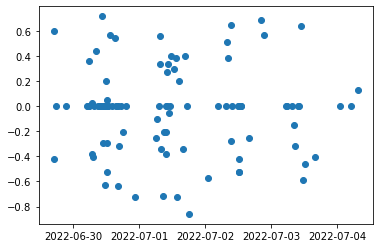

In [41]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["nltk_subjective"])

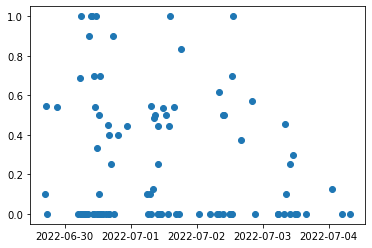

In [42]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["textblob_subjective"])

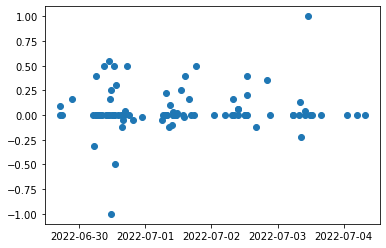

In [43]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["textblob_polarity"])

#### From file

In [44]:
def sentiment_analyzer_from_file(file_name):
    import pandas as pd
    try:
        df = pd.read_csv(file_name).drop(["Unnamed: 0"],axis = 1)
        clean_df = clean_data(df,column_filter ='News Headline')
        sentiment_df = sentiment_analyzer(clean_df,column_applied_df = "lemmatizated")
        return sentiment_df
    except Exception as e:
        print(e)

In [45]:
sentiment_analyzer_from_file('WOOF_finviz_stock.csv')

[Errno 2] No such file or directory: 'WOOF_finviz_stock.csv'


### 3a_6 Scraping Articles

##### From Urls

In [46]:
#google_stock = finviz_view_pandas_dataframe('GOOG') previously executed
Url= google_stock["URL"]
Url

0     https://finance.yahoo.com/news/tesla-recalls-f...
1     https://www.ft.com/cms/s/c44ca0c3-18b0-4deb-99...
2     https://www.investors.com/market-trend/stock-m...
3     https://finance.yahoo.com/news/british-army-tw...
4     https://finance.yahoo.com/news/california-gove...
                            ...                        
95    https://finance.yahoo.com/video/3-things-consu...
96    https://finance.yahoo.com/news/tesla-street-ex...
97    https://finance.yahoo.com/news/tesla-tsla-dips...
98    https://finance.yahoo.com/news/elon-musk-reces...
99    https://finance.yahoo.com/news/roe-v-wade-comp...
Name: URL, Length: 100, dtype: object

##### From df

In [47]:
newspaper3k_summary_from_df(google_stock,output_file_name='google_summaries')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
google_summaries.csv is created


,Article_title,Article_summary,URL
0,Tesla recalls faulty cars as safety glitch ide...,Tesla's Model 3 is currently the best-selling ...,https://finance.yahoo.com/news/tesla-recalls-f...
1,Subscribe to read,Become an FT subscriber to read:Leverage our m...,https://www.ft.com/cms/s/c44ca0c3-18b0-4deb-99...
2,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/market-trend/stock-m...
3,"British Army Twitter, YouTube Accounts Hacked ...",(Bloomberg) -- The British Army’s Twitter and ...,https://finance.yahoo.com/news/british-army-tw...
4,California Governor Newsom Runs Ads in Florida...,(Bloomberg) -- California Governor Gavin Newso...,https://finance.yahoo.com/news/california-gove...
...,...,...,...
95,3 things that will 'consume us' over the next ...,Motley FoolIf there's a perfect word to sum up...,https://finance.yahoo.com/video/3-things-consu...
96,Tesla: Street Expectations for Q2 Deliveries A...,Reflecting the extended Covid-19-related shutd...,https://finance.yahoo.com/news/tesla-street-ex...
97,Tesla (TSLA) Dips More Than Broader Markets: W...,Tesla (TSLA) closed at $685.47 in the latest t...,https://finance.yahoo.com/news/tesla-tsla-dips...
98,Elon Musk: 'A Recession Is Inevitable' - Here ...,"In fact, the majority of the stocks that Warre...",https://finance.yahoo.com/news/elon-musk-reces...


##### From file

In [48]:
newspaper3k_summary_from_csvfile("MSFT_finviz_stock.csv",output_file_name='MSFT_6_summaries')

FileNotFoundError: [Errno 2] No such file or directory: 'MSFT_finviz_stock.csv'

### Summarizing Pipeline 1:

1. Passed a ticker value to the function to download our CSV file for the ticker.
2. Declared a ticker list and used it to scrape multiple tickers and corresponding CSV files.
3. Viewed the stock data of a selected ticker.
4. Cleaned the News headline of the data.
5. (Optional) Manually declared other_stop_words list and removed those words using the function available.
6. Apply sentiment analysis on the cleaned News Headlines.
7. Analyzed the sentiment with basic scatter plot.
8. Scraped the news articles from dataframe and csv file.

## 4B News and Sentiment Pipeline 2: Stock News from Google & any Stock NEWS  website 

This pipeline is built on <a href="https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment">Nicholas Reonette</a>  Google news NLP project. I have heavily customised according to the needs of my project. Basically Google news URL is highly customizable and that is advantageous for our webscrapping needs. I have customized the function in such a way that the user can enter the number of results to be returned and choose the news website . In this project the default value of News agency is set to yahoo finance and number of results is set to 100 which can be changes when calling the Python function.

### 4b_1 Search for Stock News using Google and Yahoo Finance and strip out unwanted URLs
1. **def google_search_stocknews(ticker,num=100,site="yahoo+finance")**: This function takes the "ticker" as positional argument and "num" is the number of pages to search and "site" can be any reliable site.
2. **def strip_unwanted_urls(urls)**: As the name suggests it removes the unclean urls from the list and filters the urls which meets the standard.

In [49]:
tickers_2 = ['MSFT','TSLA', 'BTC']

In [50]:
def google_search_stocknews(ticker,num=100,site="yahoo+finance"):
    try:
        search_url = "https://www.google.com/search?q={}+{}&tbm=nws&num={}".format(site,ticker,num)
        # url_analysis: https://www.google.com/search?q={query}&tbm=nws&num=100
        # &tbm=nws: google new Tab, &num={} example: 100 and will return the top 100 results, query:site +ticker
        r = requests.get(search_url)
        soup = BeautifulSoup(r.text, 'html.parser')
        atags = soup.find_all('a')
        hrefs = [link['href'] for link in atags]
        return hrefs 
    except Exception as e:
        print(e)

In [51]:
#site is a Keyword argument and its default Value is yahoo+finance
#other examples of site can be livemint,money+control,hindustan+times
example_for_site = google_search_stocknews("AAPL",50,site='hindustan+times') 
example_for_site

['/?sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQOwgC',
 '/search?q=hindustan+times+AAPL&tbm=nws&num=50&ie=UTF-8&gbv=1&sei=rdnCYvK4F9WbseMPnrKPkAM',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUIBSgA',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUIBygC',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUICCgD',
 'https://maps.google.com/maps?q=hindustan+times+AAPL&num=50&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUICSgE',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUICigF',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiyw_fvmt_4AhXVTWwGHR7ZAzIQ_AUICygG',
 '/advanced_search',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwiyw_fvm

In [52]:
# storing the URLs in a dictionary
raw_urls_to_dictionary = {ticker:google_search_stocknews(ticker,5) for ticker in tickers_2}
raw_urls_to_dictionary

{'MSFT': ['/?sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQOwgC',
  '/search?q=yahoo+finance+MSFT&tbm=nws&num=5&ie=UTF-8&gbv=1&sei=s9nCYpvyLeqMseMPu_WDkAk',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUIBSgA',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUIBygC',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUICCgD',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUICSgE',
  'https://maps.google.com/maps?q=yahoo+finance+MSFT&num=5&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUICigF',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjbl_zymt_4AhVqRmwGHbv6AJIQ_AUICygG',
  '/advanced_search',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwjbl_zymt_4AhV

In [53]:
def strip_unwanted_urls(urls):
    try:
        # list of x that we dont want in our urls
        strip_list = ['maps','policies', 'preferences', 'accounts', 'support']
        value = []
        # LOOPING through URLs in oone ticker at a time
        for url in urls: 
            if 'https://' in url and not any(strip_word in url for strip_word in strip_list):
                result = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
                value.append(result)
        return list(set(value))
        '''
        list(set(value)) It removes the duplicate Values
        Solution 2:output =[]
        [output.append(x) for x in value if x not in output]
        '''
    except Exception as e:
        print(e)

In [54]:
(strip_unwanted_urls(raw_urls_to_dictionary['TSLA'])) 
len(strip_unwanted_urls(raw_urls_to_dictionary['TSLA']))

5

In [55]:
final_urls_list = {ticker:strip_unwanted_urls(raw_urls_to_dictionary[ticker]) for ticker in raw_urls_to_dictionary.keys()}
#final_urls_list = {ticker:strip_unwanted_urls(raw_urls_to_dictionary[ticker]) for ticker in ticker_2}
len(final_urls_list['MSFT'])
final_urls_list

{'MSFT': ['https://finance.yahoo.com/news/zacks-analyst-blog-highlights-microsoft-134701381.html',
  'https://finance.yahoo.com/news/technisys-integrates-platform-microsoft-cloud-120000535.html',
  'https://finance.yahoo.com/news/tesla-apple-microsoft-peloton-all-of-tech-companies-hitting-the-brakes-on-hiring-202428628.html',
  'https://finance.yahoo.com/news/cloocus-recognized-winner-2022-microsoft-190000159.html',
  'https://finance.yahoo.com/news/microsoft-cofounder-paul-allen-owned-134159807.html'],
 'TSLA': ['https://finance.yahoo.com/news/china-electric-vehicle-stocks-rage-010001191.html',
  'https://finance.yahoo.com/news/teslas-run-record-deliveries-may-160922541.html',
  'https://finance.yahoo.com/news/tesla-stock-split-june-2022-212130185.html',
  'https://au.finance.yahoo.com/news/tesla-recalls-faulty-cars-safety-glitch-113600162.html',
  'https://finance.yahoo.com/news/tesla-closes-office-layoff-hits-052303957.html'],
 'BTC': ['https://uk.finance.yahoo.com/news/the-crypto-m

### 4b_2 Searching and Webscrapping final URLs
1. **def scrape_articles(URLs):** The function scrapes the Url for text and limits it to 350 words by parsing it.

In [56]:
def scrape_articles(URLs):
    try:
        ARTICLES = []
        counter =0
        for url in URLs: 
            r = requests.get(url)
            soup = BeautifulSoup(r.text, 'html.parser')
            paragraphs = soup.find_all('p')
            text = [paragraph.text for paragraph in paragraphs]
            words = ' '.join(text).split(' ')[:350]
            ARTICLE = ' '.join(words)
            ARTICLES.append(ARTICLE)
            print(counter)
            counter+=1
        return ARTICLES
    except Exception as e:
        print(e)

In [57]:
articles = {ticker:scrape_articles(final_urls_list[ticker]) for ticker in final_urls_list.keys()}
#articles = {ticker:scrape_articles(final_urls_list[ticker]) for ticker in tickers_2}     
articles

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


{'MSFT': ["Chicago, IL – June 15, 2022 – Zacks.com announces the list of stocks featured in the Analyst Blog. Every day the Zacks Equity Research analysts discuss the latest news and events impacting stocks and the financial markets. Stocks recently featured in the blog include: Microsoft Corp. MSFT, Amgen Inc. AMGN, Honeywell International Inc. HON, Booking Holdings Inc. BKNG and Stryker Corp. SYK. The Zacks Research Daily presents the best research output of our analyst team. Today's Research Daily features new research reports on 16 major stocks, including Microsoft Corp., Amgen Inc., and Honeywell International Inc. These research reports have been hand-picked from the roughly 70 reports published by our analyst team today.\xa0You can see all of today's research reports here >>> Microsoft shares have held up better than the broader Tech sector in the ongoing market decline (down -19.6% in the year-to-date period vs. -24.2% decline for the Zacks Tech sector), reflecting the company'

In [58]:
articles["TSLA"]

['(Bloomberg) -- Shares of China’s electric-vehicle makers are trouncing global industry leader Tesla Inc., bolstered by Beijing’s consumption incentives and heavy dip-buying from investors. Most Read from Bloomberg Hyundai Quietly Climbs the EV Sales Charts and Elon Musk Notices Rep. Mary Miller Calls Roe Decision ‘Victory for White Life’ Russia Is Hours Away From Its First Foreign Default in a Century Russia Defaults on Foreign Debt for First Time Since 1918 Germany Pushes for G-7 Reversal on Fossil Fuels in Climate Blow American depository receipts of Nio Inc., XPeng Inc. and Li Auto Inc. have surged at least 64% each over the past month to be among the top gainers in Chinese stocks traded in the US. The sharp rally reflects improving sentiment following a monthslong slump due to worries over high valuation and supply bottlenecks. Their gains easily beat Tesla’s 17% advance, with the divergence in China and US policy outlooks and investor jitters over how Elon Musk will fund a poten

### 4b_3 Summarizing

##### Type2: Summarization Model ------------> Pegasus Model

In [59]:
summaries = {ticker:pegasus_summarize(articles[ticker]) for ticker in tickers_2}
summaries

{'MSFT': ['Research Daily features new research reports on 16 major stocks.',
  'Technisys has integrated its platform with Microsoft Cloud for Financial Services.',
  'Meta, Spotify to cut hiring plans by at least 30%. Facebook, Tesla, Redfin also suspending hiring.',
  'Cloocus won the Country of the Year 2022 Microsoft Partner of the Year Award.',
  'Portland Trail Blazers and Seattle Seahawks could be sold. Nike founder Phil Knight already submitted a $2 billion bid for the Blazers'],
 'TSLA': ['Tesla’s share price is down about 36% from this quarter’s high. China’s EV industry hit a trough during Shanghai lockdown',
  'Analysts expect Tesla to report record second-quarter deliveries. China production glitches, slow output growth highlight risks',
  'Tesla says 3-for-1 stock split would reset market price. Larry Ellison to leave Tesla board after joining in 2020',
  'Model Y and 3 cars made this year are being recalled. Fault has been linked to 59,000 vehicles globally',
  'Tesla p

###  4b_4 Adding Sentiment Analysis (Using transformers)

In [60]:
sentiment = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

In [61]:
scores = {ticker:sentiment(summaries[ticker]) for ticker in tickers_2}
scores

{'MSFT': [{'label': 'POSITIVE', 'score': 0.9659997820854187},
  {'label': 'POSITIVE', 'score': 0.939801812171936},
  {'label': 'NEGATIVE', 'score': 0.9990224838256836},
  {'label': 'POSITIVE', 'score': 0.998275876045227},
  {'label': 'NEGATIVE', 'score': 0.9984826445579529}],
 'TSLA': [{'label': 'NEGATIVE', 'score': 0.9993332028388977},
  {'label': 'NEGATIVE', 'score': 0.9980570673942566},
  {'label': 'NEGATIVE', 'score': 0.9975124597549438},
  {'label': 'NEGATIVE', 'score': 0.9993908405303955},
  {'label': 'NEGATIVE', 'score': 0.9569297432899475}],
 'BTC': [{'label': 'POSITIVE', 'score': 0.8162856101989746},
  {'label': 'NEGATIVE', 'score': 0.9959582686424255},
  {'label': 'NEGATIVE', 'score': 0.9984312653541565},
  {'label': 'NEGATIVE', 'score': 0.9983428716659546},
  {'label': 'NEGATIVE', 'score': 0.9992375373840332}]}

### 4b_5 Export to CSV

def create_csv(summaries, scores, final_urls_list) is self explanatory as we export all the required information to CSV file.

In [62]:
def create_csv(summaries, scores, final_urls_list):
    try:
        output = []
        for ticker in tickers_2:
            for counter in range(len(summaries[ticker])):
                output_this = [
                    ticker,
                    summaries[ticker][counter],
                    scores[ticker][counter]['label'],
                    scores[ticker][counter]['score'],
                    final_urls_list_list[ticker][counter]
                ]
                output.append(output_this)
        output.insert(0, ['Ticker', 'Summary', 'Label', 'Confidence', 'URL'])
        with open('ticket_summaries.csv', mode='w', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerows(final_output)
        return output
    except Exception as e:
        print(e)

### Summarizing Pipleline 2:

1. Scraped the URLs for the corresponding ticker and Nerws agency.
2. Strip out unwanted URLs from URL list.
3. Scrape News Articles for corresponding URLs.
4. Summarized the scraped articles using Pegasus model.
5. Create a CSV file with the needed fields.

## Conclusion

In conclusion this project is a great NLP Sentiment analyser base highly customizable for your project needs. I have made functions to facilitate customization easy. So I hope this project helps the investors out in the world. Also in Github it is under MIT Licence.

### Other References:
- https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment
- https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
- https://www.w3schools.com/python/

In [ ]:
import jovian
project = "Sentiment_analysis_finviz"
jovian.commit(project=project)